In [60]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.stats as stats

import scipy
import pywt
import mne
import math

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
from stats_utils import *
import glob
import os


import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Single subject analysis

In [71]:
period = 'post'
subject = '08'

data = loadmat(f'../wavelet/wavelets_mat_error__n05to05_30Hz_time/error_wavelet_all_{period}_{subject}.mat')
wavelet_transform = data['wavelet_transform']

wavelet_info = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_error__n05to05_30Hz_time/wavelet_record.mat')
freqs = wavelet_info['freqs'][0]
times = wavelet_info['times'][0]

In [72]:
#read csv with info about firsts and others
mapchange_df = pd.read_csv(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected_since/mapchange_keystrokes_{period}_{subject}.csv')
firsts_idx = mapchange_df[mapchange_df['type']=='first']['keystroke_idx'].values
others_idx = mapchange_df[mapchange_df['type']=='other']['keystroke_idx'].values

#separate trials for firsts and others and average them
wavelet_firsts_ave = wavelet_transform[firsts_idx].mean(axis =0)
wavelet_others_ave = wavelet_transform[others_idx].mean(axis =0)

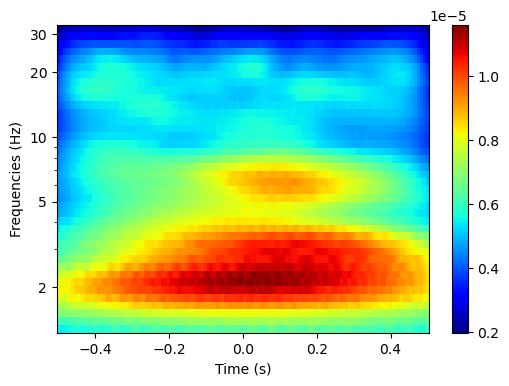

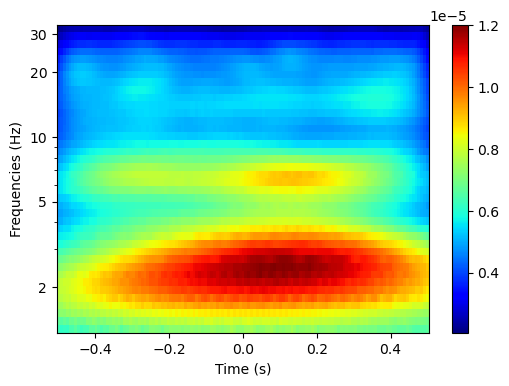

In [73]:
#plot subject averages for firsts and others
plot_scaleogram(wavelet_firsts_ave[47], freqs, times)
plot_scaleogram(wavelet_others_ave[47], freqs, times)

In [ ]:
#plot power spectrums 
firsts_powerspec = np.sum(wavelet_firsts_ave[:,:,77:90], axis = 2) #selects for approx 0-200 ms after keystroke
others_powerspec = np.sum(wavelet_others_ave[:,:,77:90], axis = 2)

plt.plot(freqs, firsts_powerspec[47])
plt.plot(freqs, others_powerspec[47])

In [ ]:
wavelet_transform.shape

(459, 64, 40, 129)

In [ ]:
np.percentile(wavelet_transform[:, 47, :,:], 99)

np.float64(2.5943204730159836e-05)

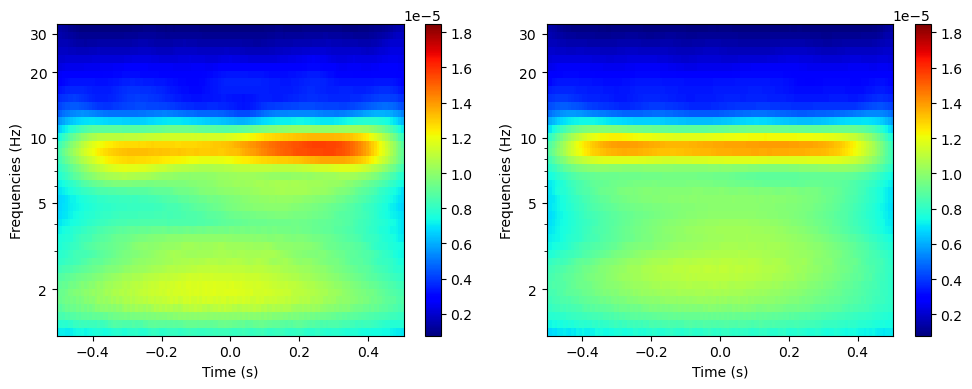

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
vmax = np.percentile(wavelet_transform[:, 47, :,:], 95)
plot_scaleogram_subplots(wavelet_firsts_ave[47], freqs, times, ax = axes[0], vmax = vmax)
plot_scaleogram_subplots(wavelet_others_ave[47], freqs, times, ax = axes[1], vmax = vmax)
plt.tight_layout()

## Group analysis

01
05
06
07
08
09
10
11
12


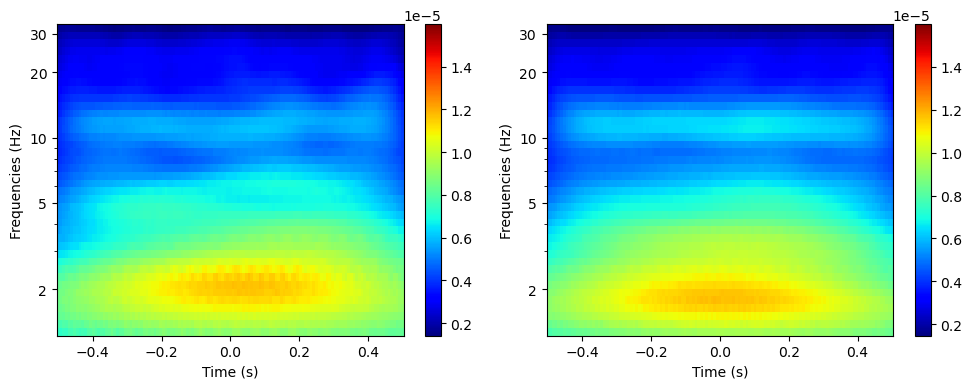

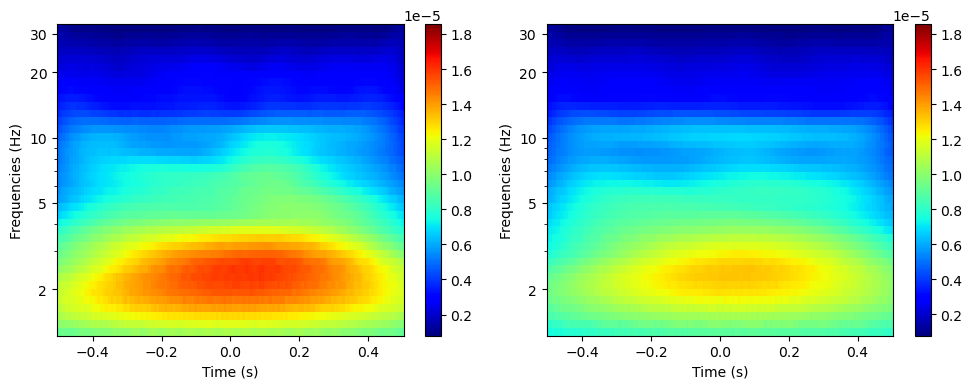

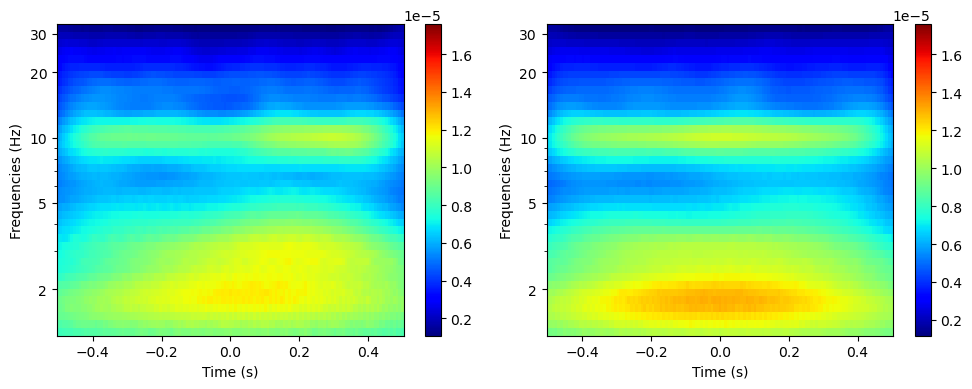

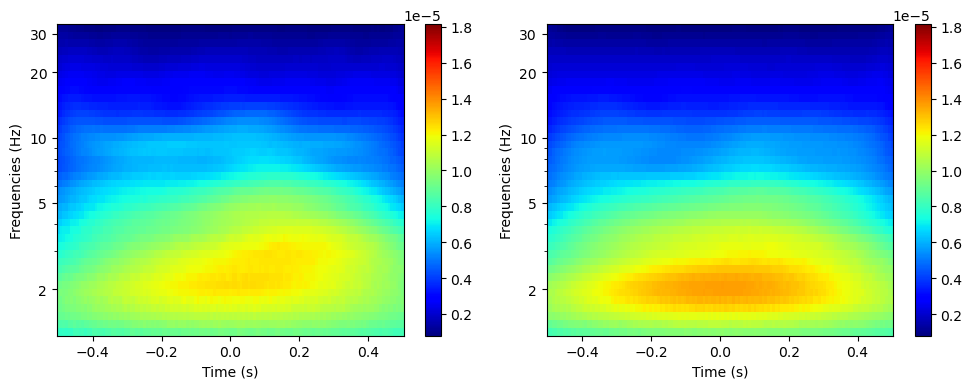

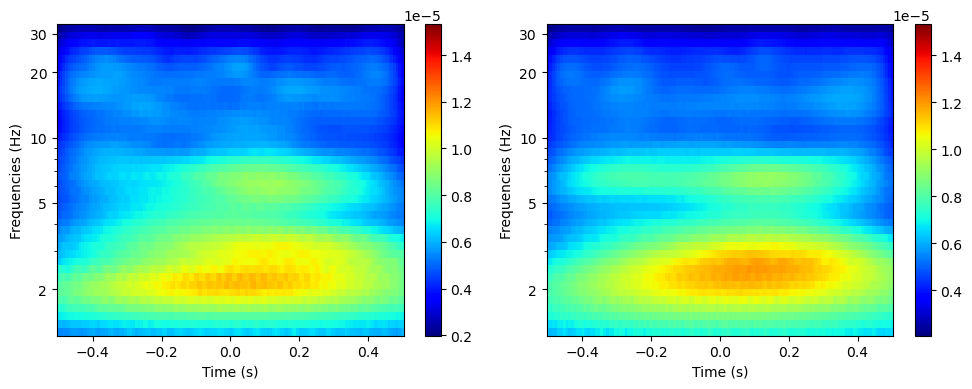

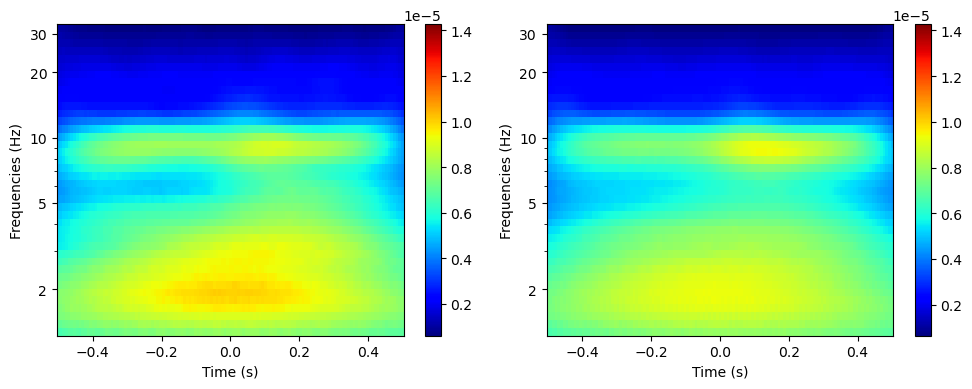

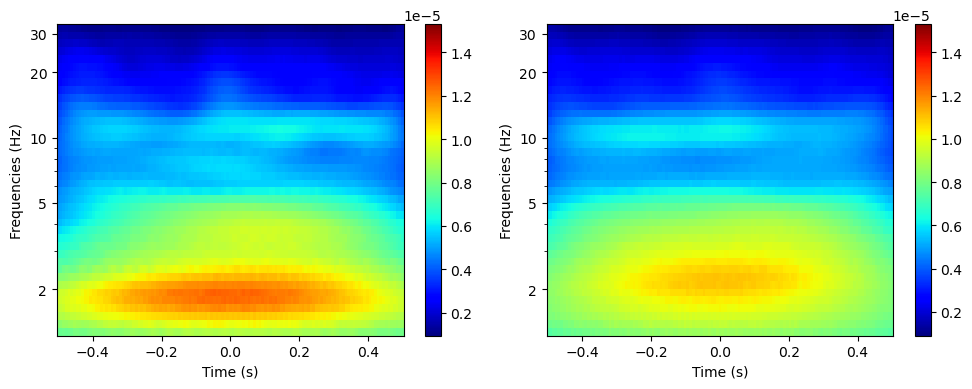

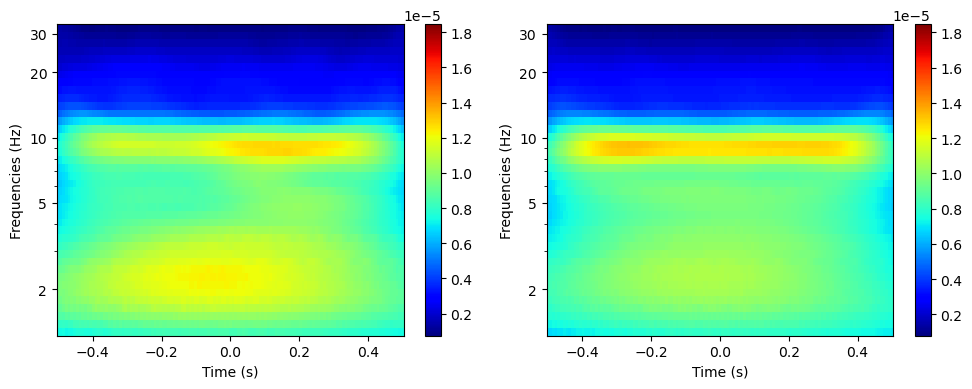

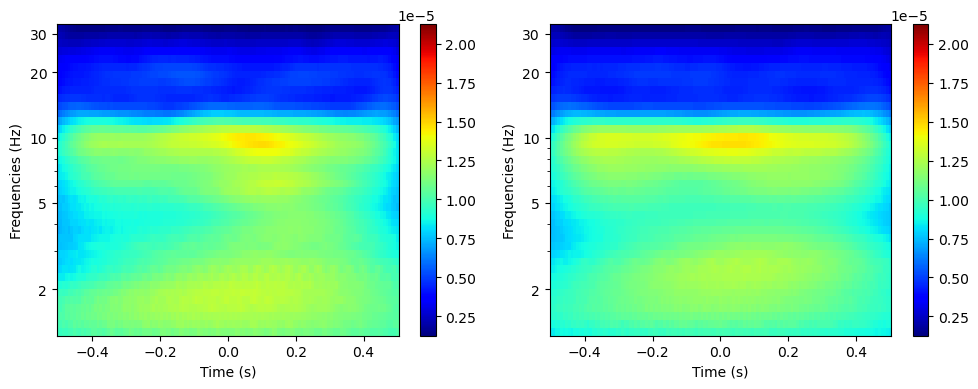

In [77]:
subjects_to_process = ['01','05','06','07','08','09', '10', '11','12']
period = 'post'

wavelet_info = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_error__n05to05_30Hz_time/wavelet_record.mat')
freqs = wavelet_info['freqs'][0]
times = wavelet_info['times'][0]

for subject in subjects_to_process:
    print(subject)

    #load wavelet
    data = loadmat(f'../wavelet/wavelets_mat_error__n05to05_30Hz_time/error_wavelet_all_{period}_{subject}.mat')
    wavelet_transform = data['wavelet_transform']


    #read csv with info about firsts and others
    mapchange_df = pd.read_csv(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv_corrected_since/mapchange_keystrokes_{period}_{subject}.csv')
    firsts_idx = mapchange_df[mapchange_df['type']=='first']['keystroke_idx'].values
    others_idx = mapchange_df[mapchange_df['type']=='other']['keystroke_idx'].values

    #separate trials for firsts and others and average them
    wavelet_firsts_ave = wavelet_transform[firsts_idx].mean(axis =0)
    wavelet_others_ave = wavelet_transform[others_idx].mean(axis =0)

    #plot scaleograms
    fig, axes = plt.subplots(1,2, figsize = (10,4))
    vmax = np.percentile(wavelet_transform[:, 47, :,:], 95)
    plot_scaleogram_subplots(wavelet_firsts_ave[47], freqs, times, ax = axes[0], vmax = vmax)
    plot_scaleogram_subplots(wavelet_others_ave[47], freqs, times, ax = axes[1], vmax = vmax)
    plt.tight_layout()
